## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# https://realpython.com/pandas-merge-join-and-concat/#pandas-concat-combining-data-across-rows-or-columns
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = len(df["Mouse ID"].unique())
print(f"There are {number_mice} mice in the dataframe.")

There are 249 mice in the dataframe.


In [3]:
# Resource: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
# https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
# Optional: Get all the data for the duplicate mouse ID. print(duplicate_data) if you want to see. 
duplicate_data = df[df.duplicated(subset= ["Mouse ID", "Timepoint"], keep=False)]

# Extract the Mouse ID, per Jay's note that there is only one duplicate mouse. 
duplicate_ID = duplicate_data["Mouse ID"].unique()
duplicate_ID = duplicate_ID[0] # Removing value from array format. 

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Note on resetting index: usually loc is okay, but merging might require reindexing. Look out for strange formatting.
df = df[df["Mouse ID"] != duplicate_ID]

In [5]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(df["Mouse ID"].unique())
print(f"There are now {number_mice} mice in the dataframe. Mouse {duplicate_ID} has been removed.")
df.shape

There are now 248 mice in the dataframe. Mouse g989 has been removed.


(1880, 8)

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Create grouby object by Drug Regimen
regimen = df.groupby(["Drug Regimen"]) 

# Begin analysis with grouby object--mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen["Tumor Volume (mm3)"].median()
regimen_var = regimen["Tumor Volume (mm3)"].var() 
regimen_std = regimen["Tumor Volume (mm3)"].std() 
regimen_sem = regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
Regimen_summary = pd.DataFrame({
    "Mean": regimen_mean,
    "Median": regimen_median,
    "Variance": regimen_var,
    "Standard Deviation" : regimen_std,
    "SEM" : regimen_sem
})
Regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

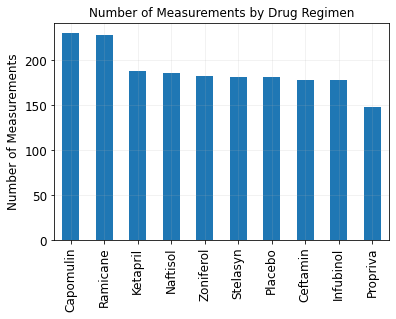

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_measurements = df["Drug Regimen"].value_counts() # getting Y values
Drug_measurements_df = pd.DataFrame({
    "Number of Measurements": number_measurements
})

Drug_measurements_df.plot(kind="bar", legend=False, title="Number of Measurements by Drug Regimen", fontsize=12)
plt.ylabel("Number of Measurements", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

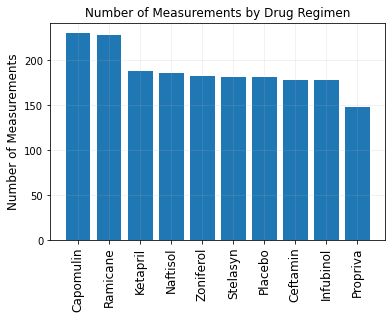

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
names = number_measurements.index # getting x values
tick_locations = [value for value in names] # setting xticks to rotate later 
plt.bar(names, number_measurements)
plt.title("Number of Measurements by Drug Regimen")
plt.xticks(tick_locations, names, rotation="vertical", fontsize=12)
plt.ylabel("Number of Measurements", fontsize=12)
plt.grid(alpha=0.2)
plt.show()


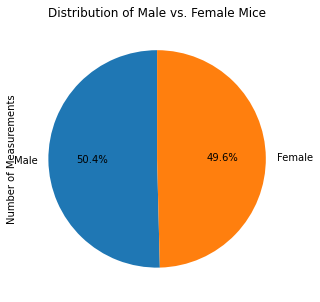

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Prep data for this section 
mouse_metadata_clean = mouse_metadata[mouse_metadata["Mouse ID"] != duplicate_ID] # removing mouse g989
sex_measurements = mouse_metadata_clean["Sex"].value_counts() # getting Y values
Sex_measurements_df = pd.DataFrame({
    "Number of Measurements": sex_measurements
})

# Plotting information 
#Sex_measurements_df.plot(kind="bar", legend=False, title="Distribution of Male vs. Female Mice")
Sex_measurements_df.plot(kind="pie", autopct="%1.1f%%", subplots=True, legend=None, figsize=(5, 5), startangle=90)
plt.title("Distribution of Male vs. Female Mice") # unsure how to remove y-axis label 
plt.show()

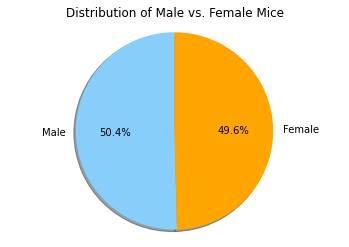

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
sexes = sex_measurements.index # could also use use_index=True

# The colors of each section of the pie chart
colors = ["lightskyblue","orange"]

# Label the chart 
plt.title("Distribution of Male vs. Female Mice")

# Creates the pie chart based upon the values above, and automatically finds the percentages of each part of the pie chart
plt.pie(sex_measurements, labels=sexes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin:
chosen_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Only select mice with these regimens 
mice_df = df.loc[df["Drug Regimen"].isin(chosen_regimens)]

# Get the list of mice to iterate through 
mice_IDs = mice_df["Mouse ID"].unique()

In [13]:
# Initialize an empty df (from instructions: "Create empty list to fill with tumor vol data (for plotting)")
Final_tumor = pd.DataFrame(columns = ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]) 

In [14]:
for mouse in mice_IDs: 
    # Start by getting the last (greatest) timepoint for each mouse
    last_timepoint_df = mice_df.loc[mice_df["Mouse ID"] == mouse]
    last_timepoint = max(last_timepoint_df["Timepoint"])
    
    # Mark which regimen was used for the treatment 
    regimen_used = last_timepoint_df.loc[last_timepoint_df["Timepoint"] == last_timepoint, ["Drug Regimen"]]
    regimen_used = regimen_used["Drug Regimen"].unique()
    
    # Grab the final tumor volume using the last timepoint for that mouse 
    final_tumor_volume = last_timepoint_df.loc[last_timepoint_df["Timepoint"] == last_timepoint, ["Tumor Volume (mm3)"]]
    final_tumor_volume = final_tumor_volume["Tumor Volume (mm3)"].unique()
    
    # Merge this group df with the original dataframe to get the tumor volume at the last timepoint...?
    Final_tumor = Final_tumor.append({"Mouse ID" : mouse, "Timepoint" : last_timepoint, "Drug Regimen": regimen_used[0], "Tumor Volume (mm3)" : final_tumor_volume[0]},  
                ignore_index = True) 
    
# Display new df 
Final_tumor


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,k403,45,Ramicane,22.050126
1,s185,45,Capomulin,23.343598
2,x401,45,Capomulin,28.484033
3,m601,45,Capomulin,28.430964
4,g791,45,Ramicane,29.128472
...,...,...,...,...
95,x822,45,Ceftamin,61.386660
96,y163,45,Infubinol,67.685569
97,y769,45,Ceftamin,68.594745
98,y865,45,Ceftamin,64.729837


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = Final_tumor.loc[Final_tumor["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
Ramicane = Final_tumor.loc[Final_tumor["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
Infubinol = Final_tumor.loc[Final_tumor["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
Ceftamin = Final_tumor.loc[Final_tumor["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
drug_data =  [Capomulin, Ramicane, Infubinol, Ceftamin] # Adding this all into one set of data to use 
    
for drug in drug_data:  
    # Get the drug name 
    if drug is Capomulin: 
        name = "Capomulin"
    elif drug is Ramicane: 
        name = "Ramicane"
    elif drug is Infubinol:
        name = "Infubinol"
    elif drug is Ceftamin:
        name = "Ceftamin"
    else: 
        print("Something has gone wrong...")
    
    # Determine upper and lower bounds
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine if there are any outliers using these bounds 
    outliers = 0 
    outliers = sum((drug > upper_bound) | (drug < lower_bound))
    
    print(f"""{name}: Upper Bound: {round(upper_bound,2)}. Lower Bound: {round(lower_bound,2)}. {outliers} outlier(s) found.""")
    
    

Capomulin: Upper Bound: 51.83. Lower Bound: 20.7. 0 outlier(s) found.
Ramicane: Upper Bound: 54.31. Lower Bound: 17.91. 0 outlier(s) found.
Infubinol: Upper Bound: 82.74. Lower Bound: 36.83. 1 outlier(s) found.
Ceftamin: Upper Bound: 87.67. Lower Bound: 25.36. 0 outlier(s) found.


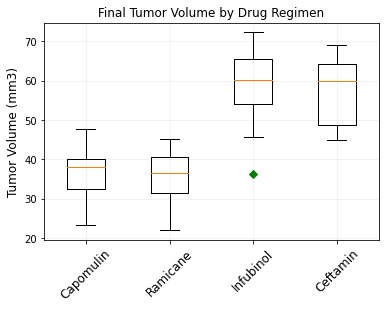

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(drug_data, 0, "gD")
ax.set_ylabel("Tumor Volume (mm3)", fontsize=12)
ax.set_title("Final Tumor Volume by Drug Regimen")
plt.xticks([1, 2, 3, 4], chosen_regimens, rotation=45, fontsize=12)
plt.grid(alpha=0.2)
plt.show()

## Line and Scatter Plots

In [17]:
# For this section, I want a mouse with max timepoints. Looking at value_counts, mouse s710 has 10 timepoints. 
# Prepping the df below. 
Capomulin_mouse = df.loc[df["Mouse ID"] == "s710", ["Timepoint", "Tumor Volume (mm3)"]]

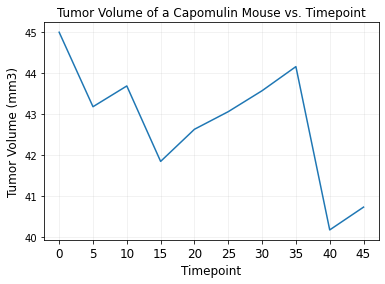

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(Capomulin_mouse["Timepoint"], Capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume of a Capomulin Mouse vs. Timepoint")
plt.xlabel("Timepoint", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.grid(alpha=0.2)
tick_locations3 = [value for value in Capomulin_mouse["Timepoint"]] # setting xticks
plt.xticks(tick_locations3, Capomulin_mouse["Timepoint"], fontsize=12) # making sure all timepoints are listed 
plt.show()


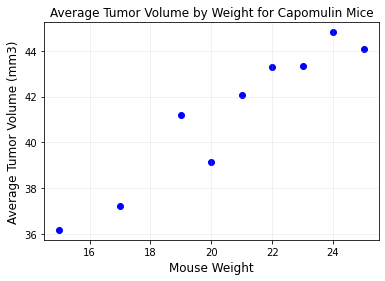

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create a df looking at Capomulin mice, returning tumor volume and weights 
Capomulin_mice = df.loc[df["Drug Regimen"] == "Capomulin", ["Tumor Volume (mm3)", "Weight (g)"]]

# Create a groupby object to get the average tumor volume by weight 
# Note: no instruction to remove duplicate mice entries (i.e. different timepoints)
Capomulin_mice_groupby = Capomulin_mice.groupby(["Weight (g)"])
Capomulin_weight_avg = Capomulin_mice_groupby.mean()

# Setting x and y values 
Capomulin_weight_avg["Weight (g)"] = Capomulin_weight_avg.index
x_values = Capomulin_weight_avg["Weight (g)"]
y_values = Capomulin_weight_avg["Tumor Volume (mm3)"]

# Plot the scatter plot 
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="blue")
plt.title("Average Tumor Volume by Weight for Capomulin Mice")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.xlabel("Mouse Weight", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

## Correlation and Regression

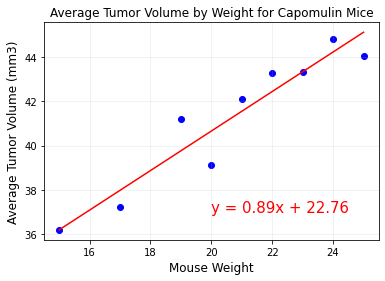

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and avg tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,37), fontsize=15, color="red")
plt.title("Average Tumor Volume by Weight for Capomulin Mice")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.xlabel("Mouse Weight", fontsize=12)
plt.grid(alpha=0.2)
plt.show()